<h2>Write a code for distance measurement in radar using correlation.</h2>

<h2>Import modules</h2>

In [171]:
# import modules
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

<h3>Helper function for plotting</h3>

In [172]:
def plot_graph(sequence, val_range, x_label = None, y_label = None, graph_title = None):
    """
    sequene: To plot
    val_range: Min-max range of the sequence
    x_label, y_label, graph_title: Labelling the plot
    """
    plt.stem(val_range, sequence, use_line_collection= True)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(graph_title)
    plt.show()

<h3>Folding</h3>

In [173]:
def folding(arr, n):
    
    # sanity check for length of timestamp and signal array must be same
    assert len(arr) == len(n)
    # print(n)
    n = np.array(n)
    #print(n)

    index_0 = np.where(n == 0)[0][0]
    
    # initiate an empty array to store our updated array
    new_arr = []
    
    # push all the positive timestamps to our new arr
    # for example in our case
    # [-1, 0, 1, 2] will be [-2, -1, 0, 1] and corresponding array values will be updated accordingly
    
    # push from 2 to 1 in reverse order
    for i in range(len(n) - 1, index_0 - 1, -1):
        new_arr.append(arr[i])
    
    # push from 0 to -1 in the same order
    for j in arr[:index_0][::-1]:
        new_arr.append(j)
    
    # our n is now [2, 1, 0, -1] hence return the negative sorted values i.e [-2, -1, 0, 1] which is our folded timestamp
    return np.array(new_arr), sorted(-n)

<h3>Padding</h3>

In [174]:
def zero_pad(arr, left_pad=0, right_pad=0):
    
    # depending on the consequences, we may need left padding i.e adding zeros on the left
    # or right padding, i.e adding zeros on the right
    # hence we have takes both paddings in the same function
    # this function will return an array as such
    # [left_padded + original_arr + right_padded]
    
    padded_arr = np.append(np.zeros((left_pad, )),
                          np.append(arr, np.zeros(right_pad, )))
    
    return padded_arr

<h3> Calculate the Convolution </h3>

In [175]:
def calculate_convolution(x, h):
    """
    parameters: 
    x -> zero padded signal of len = max_len i.e l1 + l2 - 1
    h -> our folded h(n) signal 
    """
    
    # initiate the matrix as said above
    ans = np.zeros((x.shape[0], x.shape[0]))
    
    # keep stacking the linear kernels which will be later passed on our padded signal
    for i in range(ans.shape[0]):
        if i < len(h):
            ans[i, :i + 1] = h[-i - 1:]
        else:
            ans[i, i - len(h)+1: i+1] = h
    # print to observe
    # print('\nStack of linear kernels: \n\n')
    
    # take the transpose
    ans = np.transpose(ans)
    
    # return matrix multiplication of our padded signal and our kernel matrix, this is our desired result
    return np.matmul(x, ans)

<h3>Calculate Correlation</h3>

In [176]:
def Convolution_main(x1, n1, x2, n2):
    """
    Calculates the convolution of x1 and x2 where
    x1 -> original signal
    x2 -> filter/kernel
    n1 -> timestamps of x1
    n2 -> timestamps of x2
    """
    # show signal x1
    print("Signal X is: ")
    # print("\nTime stamp of X is: ")
    plot_graph(x1, n1, y_label='$X(n)$', x_label='timestamp', graph_title='Barker Sequence')

    # show signal x2
    print("\nShifted Signal Y is: ")
    # print("\nTimestamp of H is: ")
    plot_graph(x2, n2, y_label='$Y(n)$', x_label='timestamp', graph_title='Shifted Signal $Y(n)$')


    # apply folding on second signal
    folded_H, neg_timestamp = folding(x2, n2)
    print("\nFolded H is: ")
    # print("\nTimestamp of H is: ")
    plot_graph(folded_H, neg_timestamp, x_label='timestamp', y_label='$Y(-n)$', graph_title='Y(-n)')

    # create the resutant timestamp
    # take the min of min of timestamps
    left_most_timestamp = min(min(n1), min(neg_timestamp))

    # calculate the maximum sequence length
    max_len_result = len(n1) + len(neg_timestamp) - 1
    
    # initialize the resultant convolution array with zeroes
    result_time_stamp = np.arange(left_most_timestamp, left_most_timestamp + max_len_result, 1)
    # print("\nResultant timestamp would be: ")

    # pad our Signal X upto the len of max_len
    # 3 is obtained from result_time_stamp - len(x1)
    X = zero_pad(x1, right_pad=len(result_time_stamp) - len(x1))

    # Here is our resultant convolution
    result = calculate_convolution(X, folded_H)
    
    return result, result_time_stamp

In [177]:
def correlation_main(x, n1, h, n2):
    """
    Calculates the corelation of x and h where
        x -> original signal
        h -> filter/kernel
        n1 -> timestamps of x
        n2 -> timestamps of h
    
    steps to follow:
        1. flip our signal H(n) given to get H(-n)
        2. Call our main() function to calculate the convolution of the original signal and the flipped signal
    """
    
    ###################
    # Flip the signal H(n) to get H(-n)
    flipped_h, flipped_n = folding(h, n2)
    
    # call our convolution function that we defined above
    # pass the arguments, x as main signal and flipped_h as kernel
    result, result_time = Convolution_main(x, n1, flipped_h, flipped_n)
    
    print('\nCorrelation of Signal X(n) and Y(n) is: ')

    plot_graph(result, result_time, x_label='timestamp', y_label='$X(n) * Y(-n) $', graph_title='Correlation Result')
    return result

<h3>(a) Consider 13-point Barker sequence.</h3>

    X(n) = {+1, +1, +1, +1, +1,-1 -1, +1, +1 -1, +1 -1, +1}

<h5>Consider a timestamp of length 50</h5>

In [178]:
# taking the timestamp from -30 to 30 for all
t = np.arange(0, 55, 1)
print(t)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54]


Our Original Signal is:  [ 1  1  1  1  1 -1 -1  1  1 -1  1 -1  1]
Our padded signal with same length as timestamp: 



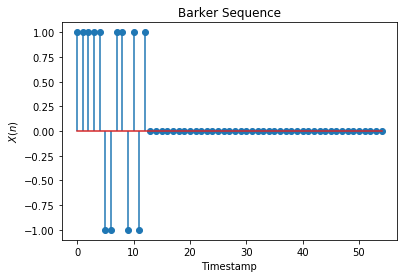

In [179]:
# consider a 13-point Barker sequence
X_n = np.array([1, 1, 1, 1, 1, -1, -1, 1, 1, -1, 1, -1, 1])
print('Our Original Signal is: ', X_n)

# pad the X(n) to have same length as our time steps
X_n = zero_pad(X_n, right_pad=42)
print('Our padded signal with same length as timestamp: \n')

plot_graph(X_n, t, x_label='Timestamp', y_label='$X(n)$', graph_title='Barker Sequence')

<h3>b) Take V (n) be a Gaussian random sequence with zero mean and variance.</h3>


\begin{equation}
    \mu = 0, \sigma = 0.01
\end{equation}

Our random Gaussian Noise is: 
 [ 0.0046429   0.02776263 -0.00855116 -0.0213411   0.0011304  -0.00167414
  0.00012348  0.00191078 -0.01082627 -0.00464964 -0.01455712  0.02184915
 -0.01471627]
Our padded signal with same length as timestamp: 



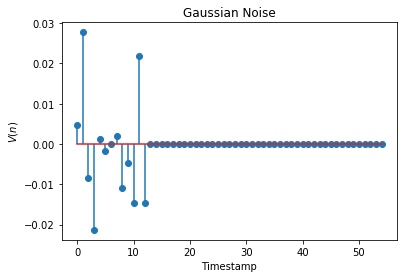

In [180]:
# Generate a gaussian random sequence with 0 maen and 0.01 std var
V_n = np.random.normal(0, 0.01, 13)
print('Our random Gaussian Noise is: \n', V_n)

# pad the X(n) to have same length as our time steps
V_n = zero_pad(V_n, right_pad=42)
print('Our padded signal with same length as timestamp: \n')
      
plot_graph(V_n, t, x_label='Timestamp', y_label='$V(n)$', graph_title='Gaussian Noise')

<h3>c) Generate a sequence Y(n), Where</h3>
<br>
\begin{equation}
    Y(n) = a X(n-D) + V(n)
\end{equation}

- Take Delay D = $20$, a = $0.9$

In [181]:
def shift_d(x, d):
    
    # as we are shiting it forward with D timesteps
    new_x = np.zeros((x.shape))
    
    new_x[d:] = x[:-d]
    new_x[:d] = np.zeros((d))
    
    return new_x

In [182]:
def gen_Yn(x, v, a, d):
    
    X_nd = shift_d(x, d)
    v_nd = shift_d(v, d)
    
    y = (a * X_nd) + v_nd
    
    return y

In [183]:
# our generated sequence Y_n
Y_n = gen_Yn(X_n, V_n, a=0.9, d=20)

<h3>d) Plot the Signal</h3>

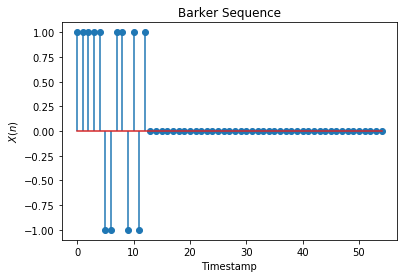

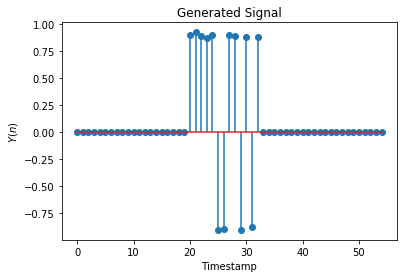

In [184]:
plot_graph(X_n, t, x_label='Timestamp', y_label='$X(n)$', graph_title='Barker Sequence')
plot_graph(Y_n, t, x_label='Timestamp', y_label='$Y(n)$', graph_title='Generated Signal')

<h3>f) Compute and plot the cross correlation result</h3>

Signal X is: 


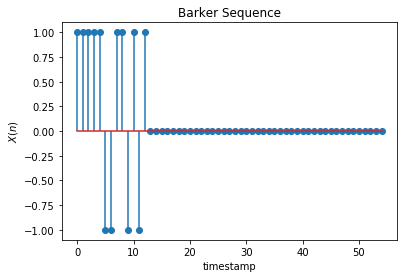


Shifted Signal Y is: 


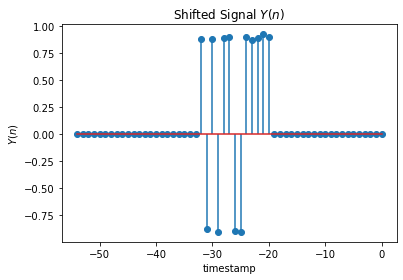


Folded H is: 


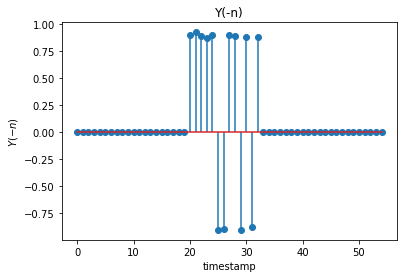


Correlation of Signal X(n) and Y(n) is: 


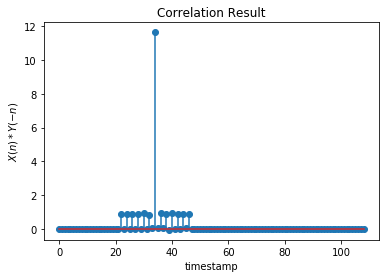

In [185]:
# call the correlation function we have defined above
correlation_result = correlation_main(X_n, t, gen_Yn(X_n, V_n, a=0.9, d=20), t)

<h3>Distance Calculation</h3>

Using cross-correlation, we can calculate delay where the spike occurs, i.e the time step where cross-correlation is maximum. We can visualize the same as, this is the time stam where both of the signals are overlapping completely. The correlation value will be maximum at the last index/timestamp of Y because that's where $X(n)$ and $Y(n)$ overlaps completely. **Kindly correct me if I am wrong.**

In [186]:
last_idx_Y = correlation_result.argmax() - 1 # subtracted 1 because of 0-based indexing
print('Last Index of Y is: ', last_idx_Y)

# delay would be last Index where Peak occured subtracted by Time period
# i.e in our case it would be 33 - 13 = 20
delay = last_idx_Y - 13
print("Delay is: ", delay)

Last Index of Y is:  33
Delay is:  20


\begin{equation}
    R = (c * delay) / 2
\end{equation}
where, $c = 3 \times 10e8$ m/s
   and R is the distance

In [187]:
c = 3 * 10e8
R = (c * delay)/2
print('Calculated Distance is: {} m/s'.format(R))

Calculated Distance is: 30000000000.0 m/s


<h4> Submitted by: </h4>

_Name_ : **Mrutyujay Biswal**
_Roll no_ : **118EI0350**